# RAPA (Robust Automated Parsimony Analysis)
## Tutorial 

## Install

## Imports

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from rapa import rapa
import requests

http://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [3]:
# Download data
file_name = 'TCGA-PANCAN-HiSeq-801x20531'
if 'downloaded' not in os.listdir('data'):
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00401/' + file_name + '.tar.gz'
    r = requests.get(url)
    if 'downloaded' not in os.listdir('data'):
        os.mkdir('data/downloaded')
    open('data/downloaded/rnaseq.tar.gz', 'wb').write(r.content)
    !gunzip data/downloaded/* -rf
    !tar -xvf data/downloaded/* -C data/downloaded/
else:
    print('Already downloaded...')

Already downloaded...


In [4]:
# load data
X = pd.read_csv('data/downloaded/' + file_name + '/data.csv')
Y = pd.read_csv('data/downloaded/' + file_name + '/labels.csv')

# Convert to numerical targets
class_convert = {'PRAD': 0, 'LUAD': 1, 'BRCA': 2, 'KIRC': 3, 'COAD': 4}
Y = Y.replace(class_convert)

# add target to feature dataframe and set index
X['target'] = Y.Class
X = X.set_index('Unnamed: 0')
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,2
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,1
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,4


In [5]:
bc_classif = rapa.RAPAClassif()
submittable_df = bc_classif.create_submittable_dataframe(input_data_df = X,
                                                        target_name = 'target',
                                                        n_features=1000)
submittable_df

/Users/joshuaschaaf/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: UserWarning: Features [    5     9    16    23  1624  1749  1765  2852  3527  4333  4370  4371
  4372  4542  4807  4808  4809  4814  4815  4816  4817  4818  4819  4822
  4824  4828  4831  4834  5288  6191  6804  6809  7262  7473  7661  7662
  7663  7664  7665  8121  8282  9290  9299  9303  9304  9306  9309  9310
  9314  9316  9320  9321  9323  9350  9452  9453  9470  9501  9520  9744
  9777 10121 10139 10668 11130 11958 12478 12487 12489 12513 12522 12542
 12553 12556 12559 12613 12629 12632 12642 12645 12649 12670 12674 12682
 12691 12709 12719 12721 12726 13860 13991 14094 14095 14158 14159 14160
 14161 14448 14550 14756 14758 15138 15140 15141 15446 15552 15554 15564
 16566 16567 16568 16569 16571 16572 16573 16574 16575 16576 16578 16579
 16603 16604 16616 16630 16634 16637 16674 16676 16677 16697 16698 16699
 16700 16701 16702 16704 16705 16706 16707 16708 16709 16

,target,partition,gene_15564,gene_16903,gene_16896,gene_16897,gene_16898,gene_16899,gene_16900,gene_16901,...,gene_18089,gene_2347,gene_12567,gene_919,gene_8741,gene_14523,gene_14818,gene_17458,gene_17010,gene_4833
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0,CV Fold 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.410884,8.732981,12.446985,8.694643,6.878308,0.000000,8.635159,14.002956,6.574874
sample_1,1,CV Fold 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.466601,7.253649,5.468007,1.590818,1.465034,7.900517,8.607733,0.000000
sample_2,0,CV Fold 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.306846,0.452595,10.321556,11.238727,11.220312,9.641004,0.000000,9.738199,10.875066,0.452595
sample_3,0,Holdout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.931418,0.434882,6.135506,12.703683,6.892998,8.125496,0.000000,9.679422,14.175939,7.492342
sample_4,2,CV Fold 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.360982,5.168542,7.499065,5.428688,2.141204,0.000000,6.663174,9.251785,2.544139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,2,CV Fold 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.159435,4.814632,7.401392,5.324361,0.865919,0.000000,4.705171,9.448878,2.841671
sample_797,1,CV Fold 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.049282,0.618051,5.361312,9.687867,8.943816,4.976423,0.000000,7.286142,8.501825,0.000000
sample_798,4,CV Fold 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.947668,5.071171,4.732964,8.563703,8.773413,5.812501,12.258790,6.371498,9.849155,1.002595


In [6]:
# Initializes the api
rapa.utils.initialize_dr_api('JOSH')

DataRobot API initiated with endpoint 'https://app.datarobot.com/api/v2'


In [7]:
"""project = bc_classif.submit_datarobot_project(submittable_df, 'target', 'tutorial_test_1000')"""

"project = bc_classif.submit_datarobot_project(submittable_df, 'target', 'tutorial_test_1000')"

In [8]:
project = rapa.utils.find_project('tutorial_test_0')
project

Project(tutorial_test_0)

,75,50,25,10,5,3
0,0.625126,0.621072,0.604924,0.575616,0.527348,0.536994
1,0.649744,0.641234,0.617816,0.583652,0.554966,0.536994
2,0.643890,0.647604,0.532350,0.531080,0.551886,0.535024
3,0.611168,0.612716,0.594232,0.500000,0.500000,0.535470
4,0.533590,0.534456,0.500000,0.582272,0.548110,0.515910
5,0.612956,0.614828,0.628828,0.563358,0.554988,0.534816
6,0.500000,0.500000,0.574744,0.586984,0.542972,0.500000
7,0.508408,0.561802,0.626574,0.562922,0.554762,0.538296
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


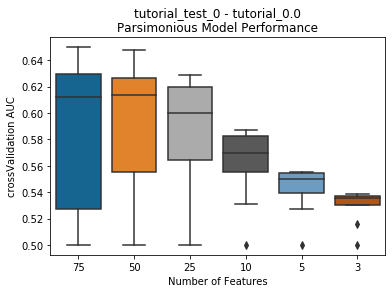

In [9]:
rapa.utils.parsimony_performance_boxplot(project, 'tutorial_0.0')

In [9]:
project

Project(tutorial_test_1000)

---------- Informative Features (733) ----------
Informative Features: Waiting for feature impact...
Feature Impact: (14.62s)


/Users/joshuaschaaf/Documents/GitHub/rapa/rapa/base.py:545: NoRedundancyImpactAvailable: Redundancy detection is not available for this model
  all_feature_importances.extend(model.get_feature_impact())


Graphing feature performance...


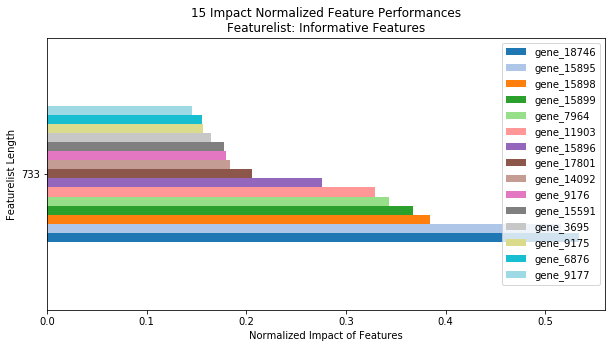

Project: tutorial_test_1000 | Featurelist Prefix: tutorial_0.2 | Feature Range: [500, 300, 100, 50, 25, 10, 5]
Feature Importance Metric: median | Model Performance Metric: AUC


  0%|          | 0/7 [00:00<?, ?it/s]

---------- tutorial_0.2 (500) ----------
Autopilot: 1016.83s
Feature Impact: 1385.85s


/Users/joshuaschaaf/Documents/GitHub/rapa/rapa/base.py:628: NoRedundancyImpactAvailable: Redundancy detection is not available for this model
  all_feature_importances.extend(model.get_feature_impact())


Waiting for DataRobot: 7.82s


/Users/joshuaschaaf/Documents/GitHub/rapa/rapa/utils.py:351: NoRedundancyImpactAvailable: Redundancy detection is not available for this model
  for x in model.get_feature_impact():
/Users/joshuaschaaf/Documents/GitHub/rapa/rapa/utils.py:344: NoRedundancyImpactAvailable: Redundancy detection is not available for this model
  for x in model.get_feature_impact():


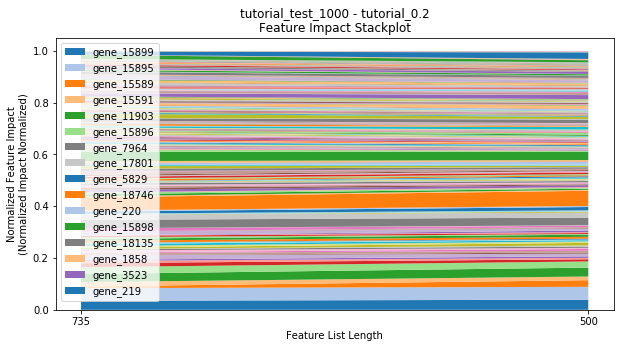

Performance Stackplot: 9.21s


ValueError: invalid literal for int() with base 10: '(500)'

In [9]:
bc_classif.perform_parsimony(feature_range=[500,300,100,50,25,10,5],
                            project=project,
                            featurelist_prefix='tutorial_0.2',
                            to_graph=['feature_performance', 'models'])

In [ ]:
ret = rapa.utils.feature_performance_stackplot(project, featurelist_prefix='tutorial_0.2', vlines=True)

In [ ]:
X.dtypes.unique()